## MINI-PROJECT - SALES BONIFICATION: BUILDING A PROGRAM TO TRIGGER A WARNING MESSAGE VIA SMS WHEN AN EMPLOYEE BEATEN THE SALES GOAL 

Imagine that your company has a database containing the names of employees and the total sales made in a specific month and you want to create a simple system for triggering messages, via SMS, when someone reaches the sales target. When an employee hits the sales target, he gets some bonus from the company. Using the Python language, we can build a simple, objective, and easily configure a system that allows the triggering of a warning via SMS when a condition is met. For the example of this mini-project, I defined that the hypothetical company's sales target is R$55,000. When the program identifies that an employee has reached the sale, a message will be triggered and an SMS will be sent to a specific number, which may be from the manager or area coordinator, for example. This type of automation can facilitate some processes within the company and can be adapted for different purposes, which can be extremely useful for decision-makers.

In [3]:
# Solution script

# 1- Open databases that are in excel spreadsheet format.
# 2- Check if any value in the sales column is greater than R$55,000.
# 3- If sales is greater than R$55,000 -> Sends an SMS with the name, month and total sales of the employee
# 4- If do not, do not take actions

In [6]:
# First, we need to install Twilio, the library that allows sending SMS via python
!pip install twilio

# Python integration with excel
!pip install openpyxl

  Created wheel for twilio: filename=twilio-6.55.0-py2.py3-none-any.whl size=1256265 sha256=66603e618b309e36140288efe9c270e89712ab4227442ffa24dcfa23fef0dda6
  Stored in directory: c:\users\pichau\appdata\local\pip\cache\wheels\c1\cc\9a\1f0d9ef9f1dacfaaaf04bb7735b2c37d104ca19006681b8926
Successfully built twilio


In [49]:
# Importing necessary packages
import pandas as pd
from twilio.rest import Client

In [50]:
# Setting Twilio to send SMS 
# Use your own account and token, get more information and create your account on https://www.twilio.com/console

# Your Account SID from twilio.com/console
    account_sid = "AXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
# Your Auth Token from twilio.com/console
auth_token  = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

client = Client(account_sid, auth_token)


In [51]:
# Creating a list of months
month_names = ["January", 
               "February", 
               "March", 
               "April", 
               "May", 
               "June"]

In [52]:
# Loading the datasets
for month in month_names:
    print(month)
    df_sales = pd.read_excel(f'{month}.xlsx')
    print(df_sales)

January
      Employee  Sales
0        Maria  41006
1     Giuseppe  38162
2         Anna  24992
3     Giovanni  30826
4      Antonio  22208
..         ...    ...
995     Glauco  26294
996      Georg  30144
997     Tullia  36002
998  Pancrazio  31030
999        Gio  37629

[1000 rows x 2 columns]
February
      Employee  Sales
0        Maria  25193
1     Giuseppe  27174
2         Anna  34971
3     Giovanni  17164
4      Antonio  22807
..         ...    ...
995     Glauco  27516
996      Georg  49195
997     Tullia  33760
998  Pancrazio  49937
999        Gio  38870

[1000 rows x 2 columns]
March
      Employee  Sales
0        Maria  22876
1     Giuseppe  31953
2         Anna  17180
3     Giovanni  32777
4      Antonio  39083
..         ...    ...
995     Glauco  26581
996      Georg  22899
997     Tullia  19810
998  Pancrazio  37649
999        Gio  23864

[1000 rows x 2 columns]
April
      Employee  Sales
0        Maria  18662
1     Giuseppe  28843
2         Anna  23288
3     Giovanni  

In [57]:
# Verifying if any total sales value in the dataset is greater than R$55,000 and returning the employee's name and total sales

for month in month_names:
    df_sales = pd.read_excel(f'{month}.xlsx')
    if (df_sales['Sales'] > 55000).any():
        employee = df_sales.loc[df_sales['Sales'] > 55000, 'Employee'].values[0]
        sales = df_sales.loc[df_sales['Sales'] > 55000, 'Sales'].values[0]
        print(f'In {month} someone hit the goal! Employee: {employee}, Total sales: {sales}')
          # Setting message on twilio
        message = client.messages.create(
            to="+xxxxx", # Add the number to which the message should be sent 
            from_="+xxxxx", # Add your own Twilio number
            body=f'In {month} someone hit the goal! Employee: {employee}, Total sales: {sales}') 
        print(message.sid)

In May someone hit the goal! Employee: Hash, Total sales: 57312
SM3a6931882ca14ff7908e53131f0b0bf2


from IPython.display import Image
Image("img/print.jpeg")

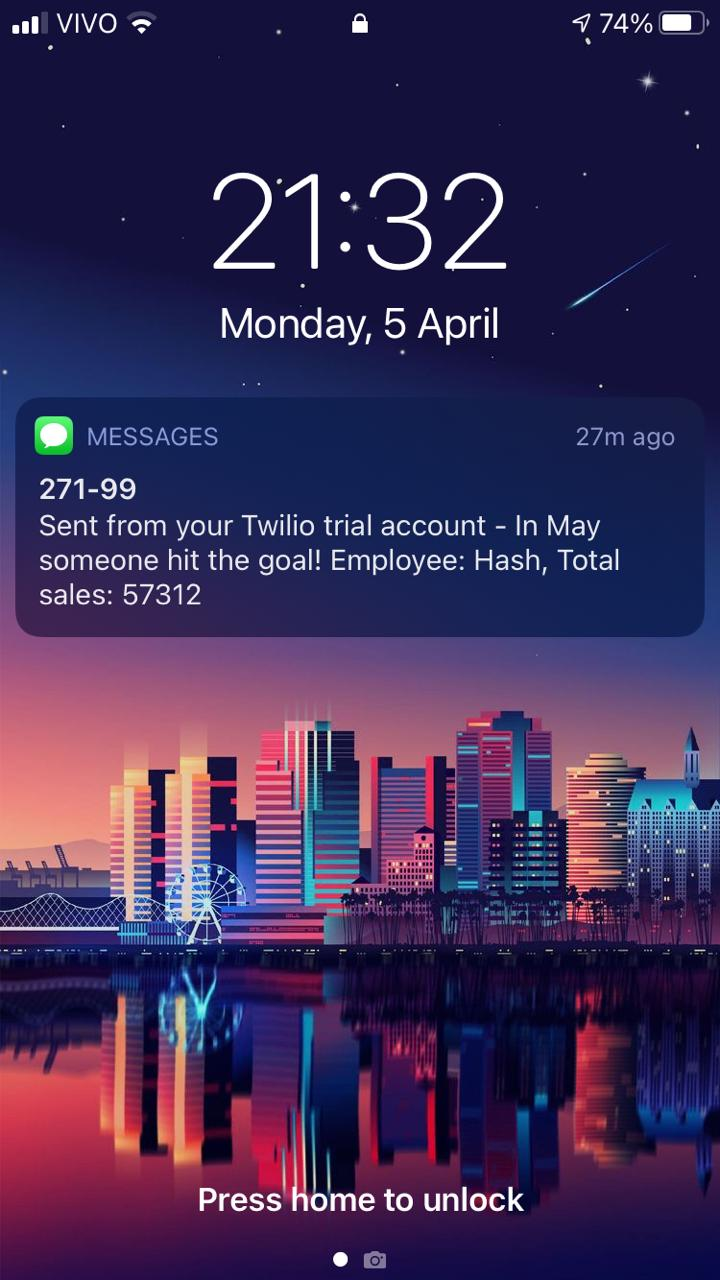

In [2]:
from IPython.display import Image
Image("img/print.jpeg")

Example of a message triggered via SMS. You can modify the content of the message and add any necessary content.